In [1]:
#! python 3
# Author: Zhou Xinyu

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)
img = cv2.imread('images/messi5.jpg')
# img = img[:,:,::-1]
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mask = np.zeros(img.shape[:2],np.uint8)


In [3]:
print (img.shape)
print (img.shape[:2])
print (type(img.shape))

(342, 548, 3)
(342, 548)
<class 'tuple'>


In [4]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask_2[:,:,np.newaxis]

In [5]:
# print (mask)
# print (type(img))
# plt.imshow(mask_2)

In [6]:
# plt.imshow(img),plt.colorbar(),plt.show()

# newmask is the mask image I manually labelled
newmask = cv2.imread('images/messi_mask.png',0)
# print(newmask)

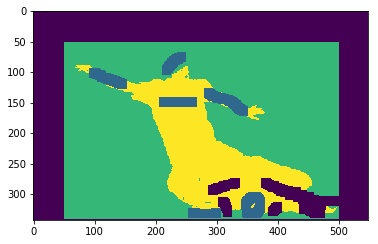

In [7]:
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 150] = 1
plt.imshow(mask)

In [8]:
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_EVAL)

In [9]:
# print(type(cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)))

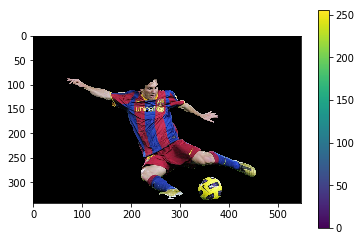

(<matplotlib.image.AxesImage at 0x12441e208>,
 None)

In [10]:
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

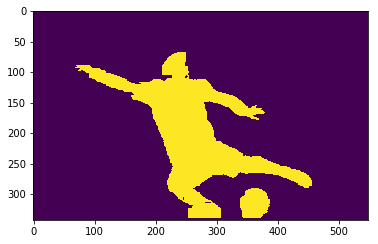

In [11]:
plt.imshow(mask)

In [12]:
# cv2.imshow("Image", img)
# cv2.waitKey (0)

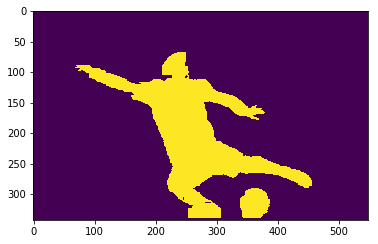

In [13]:
plt.imshow(np.where((mask==2)|(mask==0),0,1).astype('uint8'))